In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def R_TM(chi_i, n1, n2):
    """
    Calculates the power reflectance R_TM for TM-polarized light,
    correctly handling total internal reflection.
    """

    cos_chi_i = np.cos(chi_i)

    # Calculate the discriminant: n2^2 - (n1*sin(chi_i))^2
    discrim = n2**2 - (n1 * np.sin(chi_i))**2

    # Cast to complex *before* the sqrt.
    # If discrim is positive, np.sqrt gives a real number.
    # If discrim is negative, np.sqrt gives an imaginary number.
    cos_chi_t = (1.0 / n2) * np.sqrt(discrim.astype(complex))

    # Now calculate the complex reflection amplitude, r_TM
    r_tm = (n2 * cos_chi_i - n1 * cos_chi_t) / \
           (n2 * cos_chi_i + n1 * cos_chi_t)


    # np.abs() gets the magnitude of a complex number.
    R_tm = np.abs(r_tm)**2

    return R_tm


# 1. Create angles from 0 to 89 degrees
chi_i_degrees = np.linspace(0, 89, 1000)
# 2. Convert angles to RADIANS for numpy's trig functions
chi_i_radians = np.deg2rad(chi_i_degrees)

n1 = 1.50
n2 = 1.00
# 3. Call the corrected function
R = R_TM(chi_i_radians, n1, n2)
T = 1.0 - R


The critical angle is approximately equal to 41.871871871871875
The Brewster angle is approximately equal to 33.67567567567568


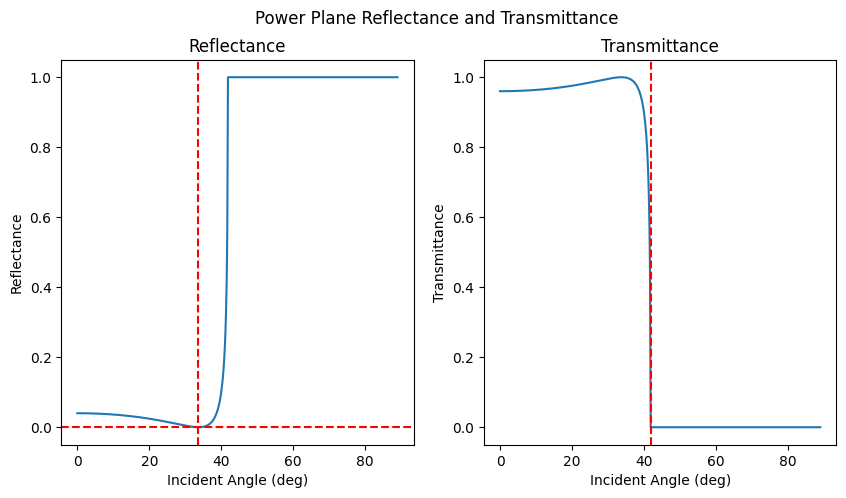

In [96]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

target_value = 0.0

#calculate absolute differences
diff = np.abs(R - target_value)
diff2 = np.abs(T - target_value)

#find the index of the minimum difference
idx = np.argmin(diff)
idx2 = np.argmin(diff2)

#get the closest value
closest_value = chi_i_radians[idx] * 180/np.pi
closest_value2 = chi_i_radians[idx2] * 180/np.pi

print(f"The critical angle is approximately equal to {closest_value2}")
print(f"The Brewster angle is approximately equal to {closest_value}")

fig.suptitle('Power Plane Reflectance and Transmittance')
ax[0].plot(chi_i_degrees, R)
ax[0].set_xlabel('Incident Angle (deg)')
ax[0].set_ylabel('Reflectance')
ax[0].set_title('Reflectance')
ax[0].axvline(x=closest_value, c='r', linestyle="--")
ax[0].axhline(y=0, c='r', linestyle="--")

ax[1].plot(chi_i_degrees, T)
ax[1].set_xlabel('Incident Angle (deg)')
ax[1].set_ylabel('Transmittance')
ax[1].set_title('Transmittance')
ax[1].axvline(x=closest_value2, c='r', linestyle="--")

plt.show()

Text(0, 0.5, 'Power')

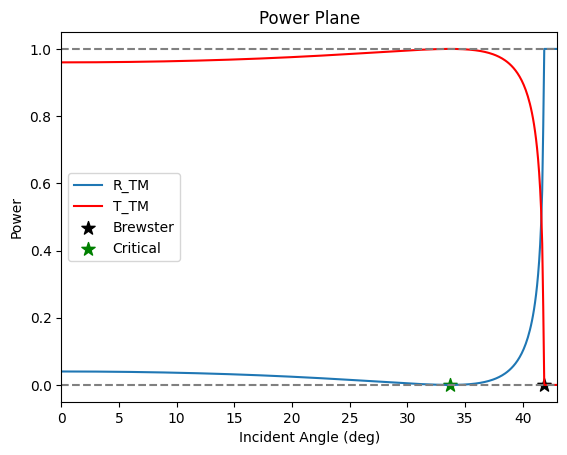

In [105]:
plt.plot(chi_i_degrees, R, label="R_TM")
plt.plot(chi_i_degrees, T, c="r", label="T_TM")
plt.axhline(y=0, c='gray', linestyle="--")
plt.axhline(y=1, c='gray', linestyle="--")
plt.xlim((0,43))

Tx_pt = closest_value2
Ty_pt = 0

plt.scatter(Tx_pt, Ty_pt, marker='*', color='black', s=100, label='Brewster')
plt.scatter(closest_value, 0, marker='*', color='green', s=100, label='Critical')


plt.legend(loc="best")
plt.title("Power Plane")
plt.xlabel("Incident Angle (deg)")
plt.ylabel("Power")

Computing the analytical values of the critical and Brewster angles

In [98]:

brewster = np.arctan(n2/n1) * 180/np.pi
critical = np.arcsin(n2/n1) * 180/np.pi

print(f"The analytical solution for the critical angle is {critical} deg")
print(f"The analytical solution for the Brewster angle is {brewster} rad")

The analytical solution for the critical angle is 41.810314895778596 deg
The analytical solution for the Brewster angle is 33.690067525979785 rad
